# Starting Point

In [ ]:
!pip install squarify

In [ ]:
# load data
from google.colab import files
upl = files.upload()

Saving data.csv to data.csv


## reboot


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read data
df = pd.read_csv('data.csv', encoding="windows-1252")
# display data
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Text(0.5, 1.0, 'Data Statistical Summary ')

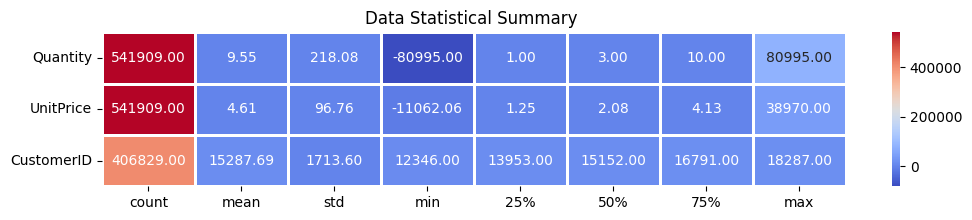

In [ ]:
# Data description
desc = df.describe().T

# Plot the heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(desc, annot=True, fmt=".2f", cmap="coolwarm", linewidths=2)

plt.title("Data Statistical Summary ")

In [ ]:
# check for missing values
# df.isnull().sum() # - checks all columns to see which have missing values
# method two
missing_values = df.isna().sum() # counts missing values in each column
missing_columns = missing_values[missing_values > 0] # filters columns that have at least one missing value
print(missing_columns)

Description      1454
CustomerID     135080
dtype: int64


In [ ]:
# dropping rows with missing values
print('Initial dataset shape before dropping missing values:', df.shape)
# drop missing values
df = df.dropna()
# new line to separate result
print('-----------------------------------------------------')
print('Final dataset shape after dropping missing values:', df.shape)

Initial dataset shape before dropping missing values: (541909, 8)
-----------------------------------------------------
Final dataset shape after dropping missing values: (406829, 8)


In [ ]:
# check for data duplication
print('The amount of duplicated data present:',df.duplicated().sum())
# droping duplicated data
df = df.drop_duplicates()
# new line to separate result
print('-----------------------------------------------------')
print('Final amount of duplicated values remaining:', df.duplicated().sum())

The amount of duplicated data present: 5225
-----------------------------------------------------
Final amount of duplicated values remaining: 0


In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
# convert to date time data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Get year
df['Year'] = df['InvoiceDate'].dt.year
# get month
df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
# new df
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [ ]:
# data type inconsistencies
# convert customer ID from float to categorical
df['CustomerID'] = df['CustomerID'].astype('int').astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  category      
 7   Country      401604 non-null  object        
 8   Year         401604 non-null  int32         
 9   Month        401604 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 28.5+ MB


In [ ]:
# dealing with negatives
df = df[df['UnitPrice']>  0]
df = df[df['Quantity']>  0]

Text(0.5, 1.0, 'Data Statistical Summary ')

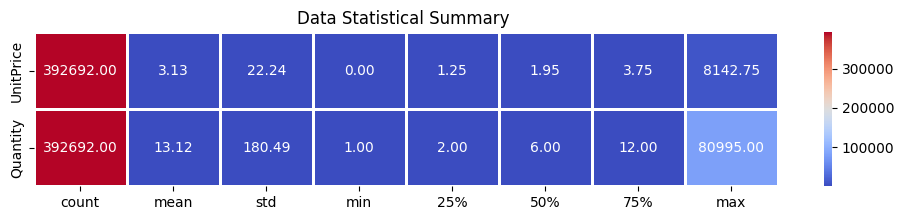

In [ ]:
# selected columns
df_to_describe = df[[ 'UnitPrice', 'Quantity']]
# Data description
desc = df_to_describe.describe().T

# Plot the heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(desc, annot=True, fmt=".2f", cmap="coolwarm", linewidths=2)

plt.title("Data Statistical Summary ")

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,392692.0,13.119702,1.0,2.0,6.0,12.0,80995.0,180.492832
InvoiceDate,392692,2011-07-10 19:13:07.771892480,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 12:02:00,2011-10-20 12:53:00,2011-12-09 12:50:00,NaN
UnitPrice,392692.0,3.125914,0.001,1.25,1.95,3.75,8142.75,22.241836
Year,392692.0,2010.934631,2010.0,2011.0,2011.0,2011.0,2011.0,0.247177
Month,392692.0,7.601871,1.0,5.0,8.0,11.0,12.0,3.415015


In [ ]:
df.CustomerID.nunique()

4338

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px

# Step 1: Aggregate orders per country
country_counts = df.groupby("Country")["InvoiceNo"].nunique().reset_index()
country_counts.columns = ["Country", "OrderCount"]


fig = px.choropleth(country_counts,
                     locations="Country",
                     locationmode="country names",
                     color="OrderCount",
                     color_continuous_scale="Viridis",
                     title="Number of Orders by Country")

fig.show()

# # Step 2: Define the choropleth map
# fig = go.Figure(data=go.Choropleth(
#     locations=country_counts["Country"],
#     locationmode="country names",
#     z=country_counts["OrderCount"],
#     text=country_counts["Country"],
#     colorscale="Viridis",
#     colorbar_title="Orders"
# ))

# # Step 3: Layout settings
# fig.update_layout(
#     title_text="Number of Orders by Country",
#     title_x=0.5,  # Center align title
#     geo=dict(
#         showocean=True,
#         oceancolor="LightBlue",
#         showland=True,
#         landcolor="whitesmoke",
#         showframe=False
#     ),
#     height=600,
#     width=1000
# )

# # Step 4: Show the map
# iplot(fig)

In [ ]:
## dont bother, its ahot mess
# check for outliers:

# Determine grid size dynamically
# num_features = len(df.columns)
# cols = 4  # Set number of columns
# rows = (num_features // cols) + (num_features % cols > 0)  # Auto-adjust rows

# # Plot boxplots
# plt.figure(figsize=(cols * 5, rows * 4))
# for index, column in enumerate(df.columns):
#     plt.subplot(rows, cols, index + 1)
#     sns.boxplot(data=df, x=column, palette='magma')
#     plt.title(column)  # Add title for clarity
#     plt.xticks(rotation=45)  # Rotate labels for readability if needed

# plt.tight_layout(pad=1.5)
# plt.show()

Text(0.5, 1.0, 'No Outlier Data Statistical Summary ')

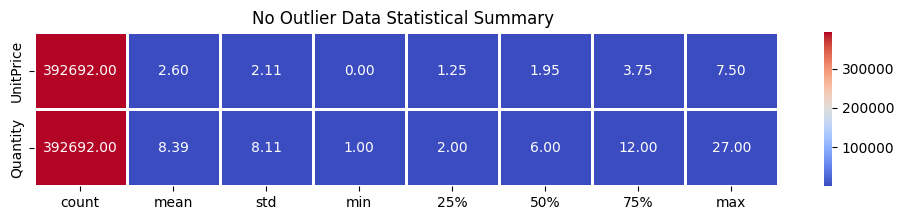

In [ ]:
# dealing with outliers throught threshold replacement.
def replace_with_threshold(data, columns):
  for col in columns:
    q1 = data[col].quantile(0.25) #first quantile
    q3 = data[col].quantile(0.75) # third quantile
    iqr = q3 - q1 # interquantile range

    Lower_bound = q1 - 1.5 * iqr # lower limit
    Upper_bound = q3 + 1.5 * iqr # upper quartile

    # dealing with outliers using np.where

    data[col] = np.where(data[col]< Lower_bound, Lower_bound, data[col])
    data[col] = np.where(data[col] > Upper_bound, Upper_bound, data[col])
  return data

# instantiate function
outlier_cols = ['UnitPrice','Quantity']
replace_with_threshold(df, outlier_cols)

# display new data description
df_no_outlier = df[[ 'UnitPrice', 'Quantity']]
# Data description
desc = df_no_outlier.describe().T

# Plot the heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(desc, annot=True, fmt=".2f", cmap="coolwarm", linewidths=2)

plt.title("No Outlier Data Statistical Summary ")

In [ ]:
# Add sales data to df
df['Sales'] = df['UnitPrice']*df['Quantity']
# data preview
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34


In [ ]:
# Get Monthly sales rounded

monthly_sales = df.groupby('Month')['Sales'].sum()
# round result to the nearest integer
monthly_sales = monthly_sales.round(0).astype(int)
# Monthly preveiw
monthly_sales

,Sales
Month,
1,331497
2,313458
3,409922
4,330243
5,469514
6,414239
7,408761
8,428500
9,648924


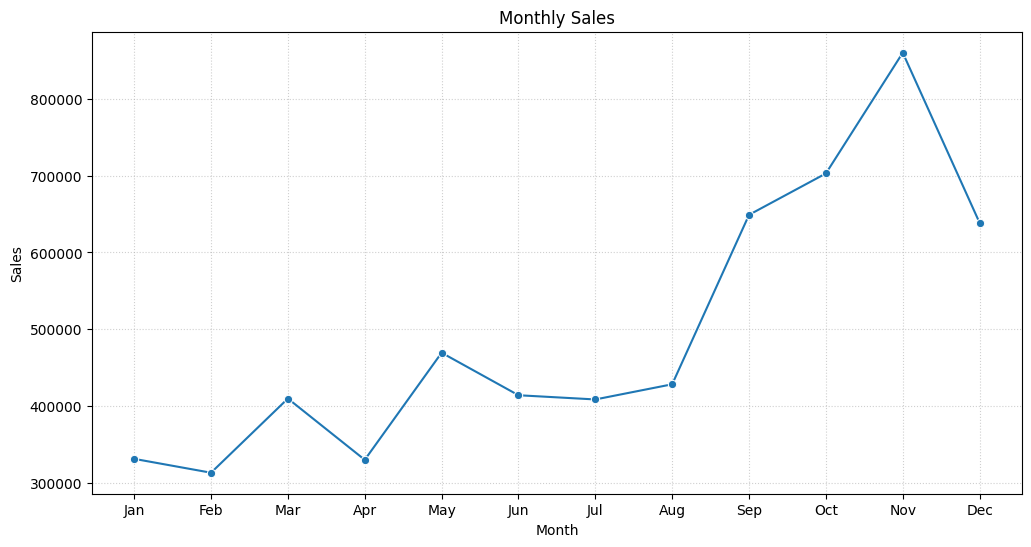

In [ ]:
# Months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# line chart
plt.figure(figsize=(12,6))
sns.lineplot(x=months, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True,alpha=.6, linestyle=':')
plt.show()

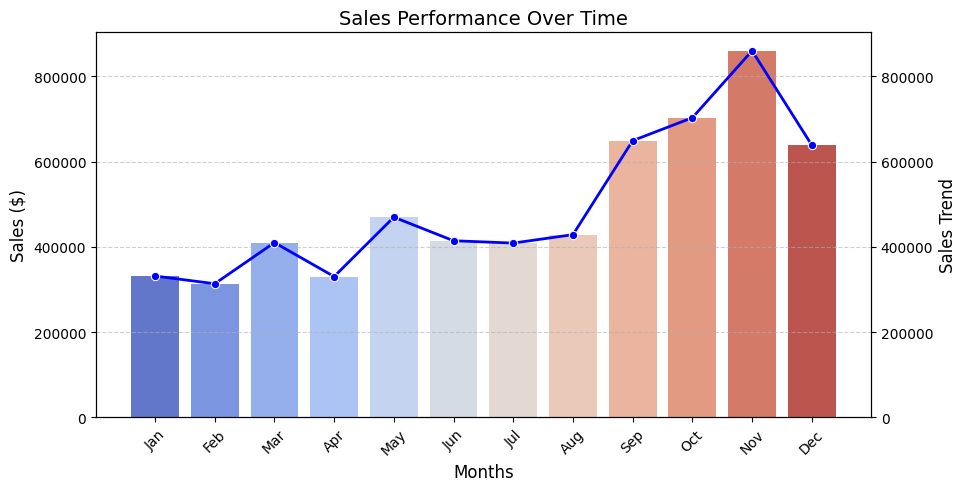

In [ ]:

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for sales
sns.barplot(x=months, y=monthly_sales.values, palette='coolwarm', ax=ax1)

# Line chart for sales trend (overlayed on the bar chart)
ax2 = ax1.twinx()
sns.lineplot(x=months, y=monthly_sales.values, marker='o', color='blue', linewidth=2, ax=ax2,)
ax2.set_ylim(ax1.get_ylim())

# Formatting
ax1.set_xlabel('Months', fontsize=12)
ax1.set_ylabel('Sales ($)', fontsize=12)
ax2.set_ylabel('Sales Trend', fontsize=12)

ax1.set_title('Sales Performance Over Time', fontsize=14)
ax1.set_xticklabels( labels=months,rotation=45)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

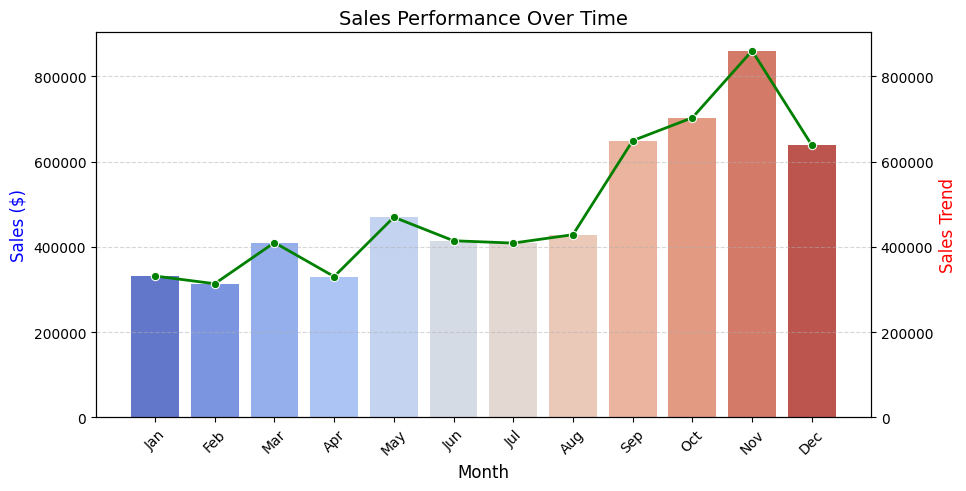

In [ ]:

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for sales
sns.barplot(x=months, y=monthly_sales, palette='coolwarm', ax=ax1, zorder=2)

# Line chart for sales trend (overlayed on the bar chart)
ax2 = ax1.twinx()
sns.lineplot(x=months, y=monthly_sales, marker='o', color='green', linewidth=2, ax=ax2, zorder=3)

# Formatting
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Sales ($)', fontsize=12, color='blue')
ax2.set_ylabel('Sales Trend', fontsize=12, color='red')

ax1.set_title('Sales Performance Over Time', fontsize=14)
ax1.set_xticks(range(len(months)))
ax1.set_xticklabels(months, rotation=45)

# Ensure the line markers appear **above** the bars
ax2.set_ylim(ax1.get_ylim())  # Ensures both axes have the same scale
ax1.set_zorder(3)  # Bars behind
ax2.set_zorder(4)  # Line chart on top
ax1.patch.set_visible(False)  # Hides the background for better visibility

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# RMF Analyisis

In [ ]:
# most recent date
recent_date = df['InvoiceDate'].max()
print('The most recent purchase:',recent_date)

The most recent purchase: 2011-12-09 12:50:00


In [ ]:
# RMF data by groupinf it by user
df_RMF = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (recent_date - x.max()).days,  # Recency: Days since last purchase
    'InvoiceNo': 'nunique',  # Frequency: Number of unique purchases
    'Quantity': lambda x: (x * df.loc[x.index, 'UnitPrice']).sum()  # Monetary: Total amount spent
})

# Rename columns
df_RMF.columns = ['Recency', 'Frequency', 'Monetary']

# Remove customers with zero spending
rfm = df_RMF[df_RMF['Monetary'] > 0]

# Display the first few rows
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325.0,1,28.08
12347,1.0,7,3877.44
12348,74.0,4,557.57
12349,18.0,1,1336.65
12350,309.0,1,301.90


In [ ]:
# RMF Scores, through Quantify ranking
# Apply quantile-based ranking (1 = worst, 5 = best)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])  # Recent customers get higher scores
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])  # Frequent buyers get higher scores
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])  # High spenders get higher scores

# Create RFM Score (concatenating R, F, and M scores)
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Display the first few rows
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12346,325.0,1,28.08,1,1,1,111
12347,1.0,7,3877.44,5,5,5,555
12348,74.0,4,557.57,2,4,3,243
12349,18.0,1,1336.65,4,1,4,414
12350,309.0,1,301.90,1,1,2,112


In [ ]:
rfm.RFM_Score.unique()

array(['111', '555', '243', '414', '112', '354', '114', '435', '415',
       '524', '345', '335', '223', '544', '122', '511', '324', '334',
       '413', '522', '124', '215', '224', '445', '144', '423', '213',
       '344', '323', '455', '325', '314', '244', '312', '214', '425',
       '235', '123', '234', '333', '133', '313', '443', '233', '554',
       '113', '433', '545', '311', '355', '225', '411', '221', '422',
       '245', '424', '553', '513', '534', '322', '222', '454', '212',
       '432', '115', '321', '232', '412', '434', '121', '211', '512',
       '535', '125', '143', '533', '254', '543', '523', '514', '343',
       '132', '444', '453', '532', '141', '255', '154', '332', '131',
       '542', '231', '252', '521', '155', '342', '442', '315', '421',
       '242', '331', '551', '134', '431', '353', '531', '253', '341',
       '152', '145', '142', '241', '153', '441', '552', '452', '541',
       '351', '251'], dtype=object)

In [ ]:
seg_map = {
    r'[1-2][1-2][1-2]': 'hibernating',  # Low recency, low frequency, low monetary
    r'[1-2][1-2][3-5]': 'at_risk',  # Low recency, low frequency, moderate/high monetary
    r'[1-2][3-5][3-5]': 'cant_loose',  # Low recency but moderate/high frequency & monetary
    r'3[1-2][1-2]': 'about_to_sleep',  # Medium recency, low frequency, low monetary
    r'3[3-5][3-5]': 'Consistent',  # Medium recency, moderate/high frequency & monetary
    r'[3-5][4-5][4-5]': 'loyal_customers',  # Good recency, high frequency, high monetary
    r'41[1-2]': 'promising',  # Recent, low frequency, low monetary
    r'51[1-2]': 'new_customers',  # Most recent but low frequency & monetary
    r'[4-5][2-3][2-3]': 'potential_loyalists',  # Good recency, moderate frequency & monetary
    r'5[4-5][4-5]': 'champions',  # Best customers in all categories
    r'[1-5][1-5][1-5]': 'others'  # Catch-all for unmatched values
}

rfm['segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)

# Check if any are still unclassified
rfm['segment'].fillna('uncategorized', inplace=True)

# Print segment counts
print(rfm['segment'].value_counts())

segment
loyal_customers        972
hibernating            829
others                 789
cant_loose             436
Consistent             428
potential_loyalists    285
about_to_sleep         245
at_risk                236
promising               83
new_customers           35
Name: count, dtype: int64


## Segmenation Visualizations

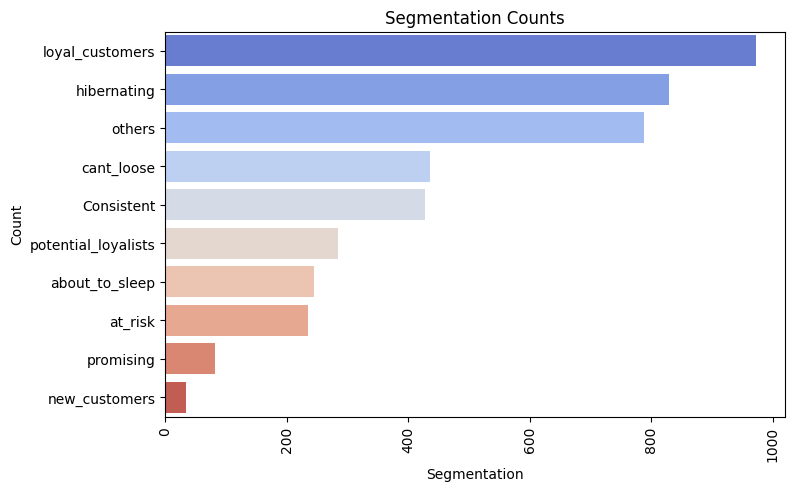

In [ ]:
# segmentation countplot
plt.figure(figsize=(8, 5))
sns.countplot(y=rfm['segment'], order=rfm['segment'].value_counts().index, palette='coolwarm')
plt.title('Segmentation Counts')
plt.xlabel('Segmentation')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


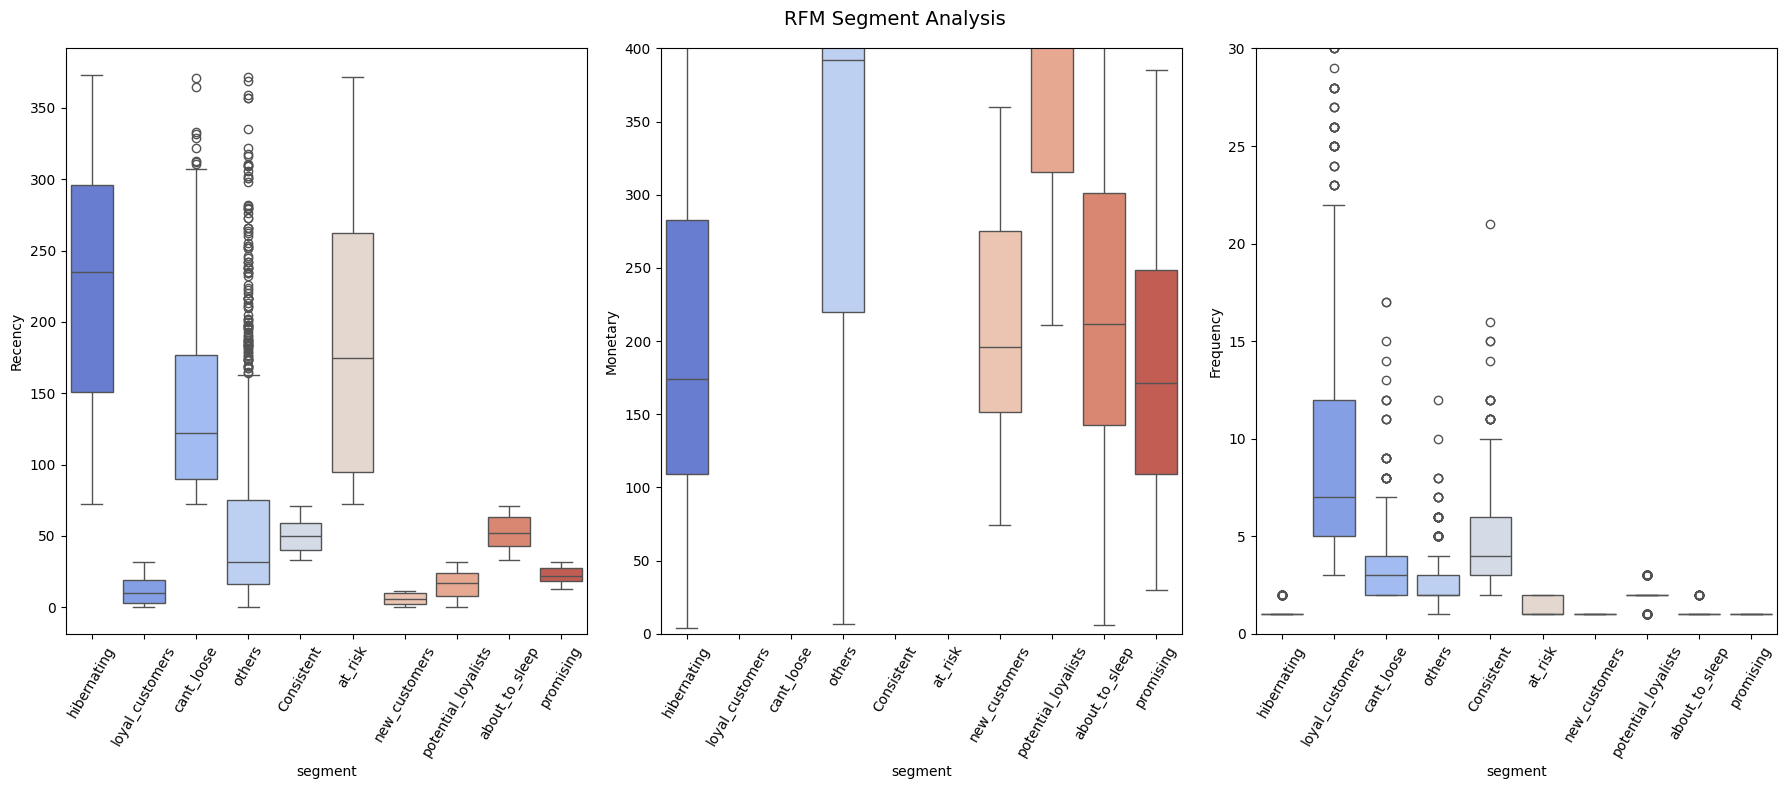

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["Recency", "Monetary", "Frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette='coolwarm'
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

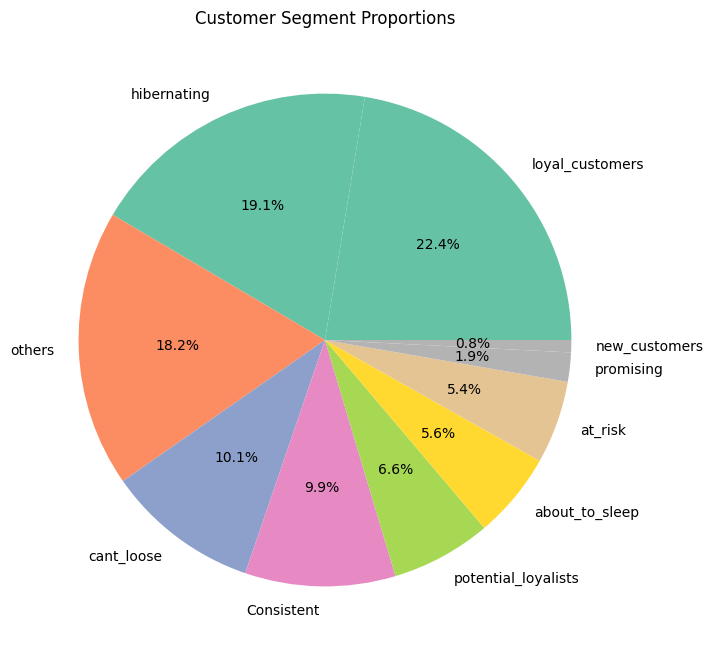

In [ ]:
rfm['segment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), cmap='Set2')
plt.ylabel('')
plt.title('Customer Segment Proportions')
plt.show()

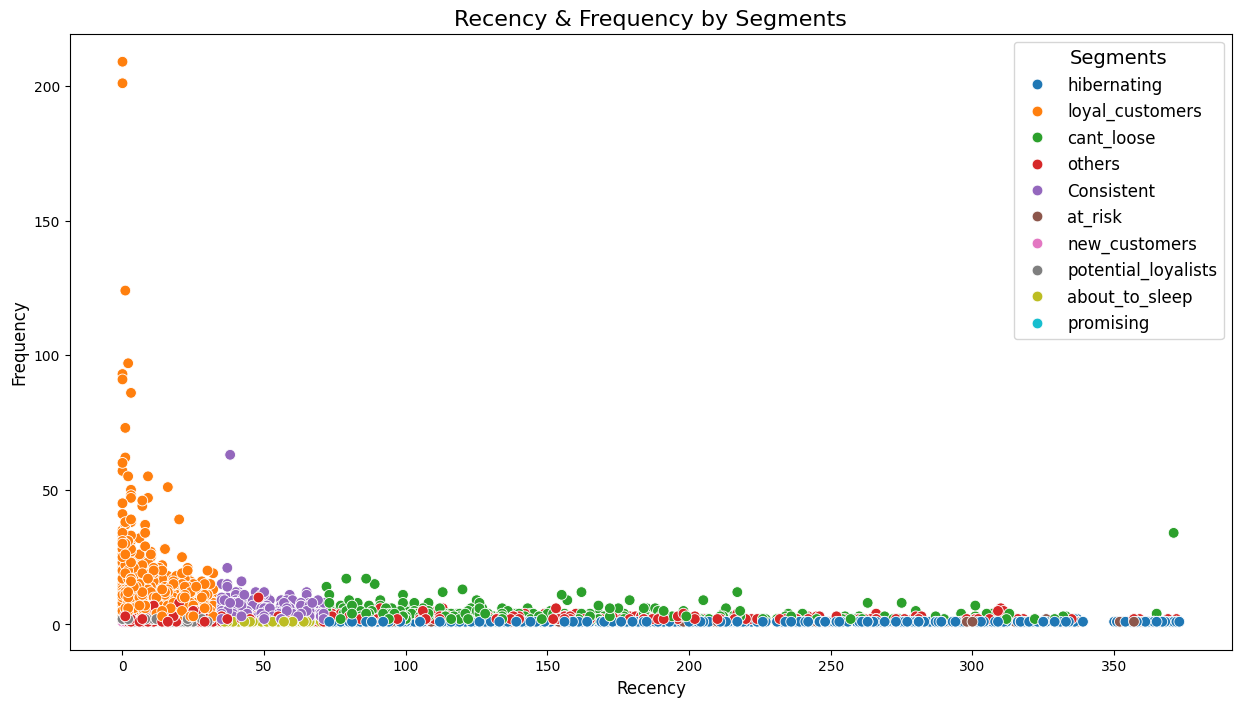

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=rfm, x="Recency", y="Frequency", hue="segment", palette='tab10', s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

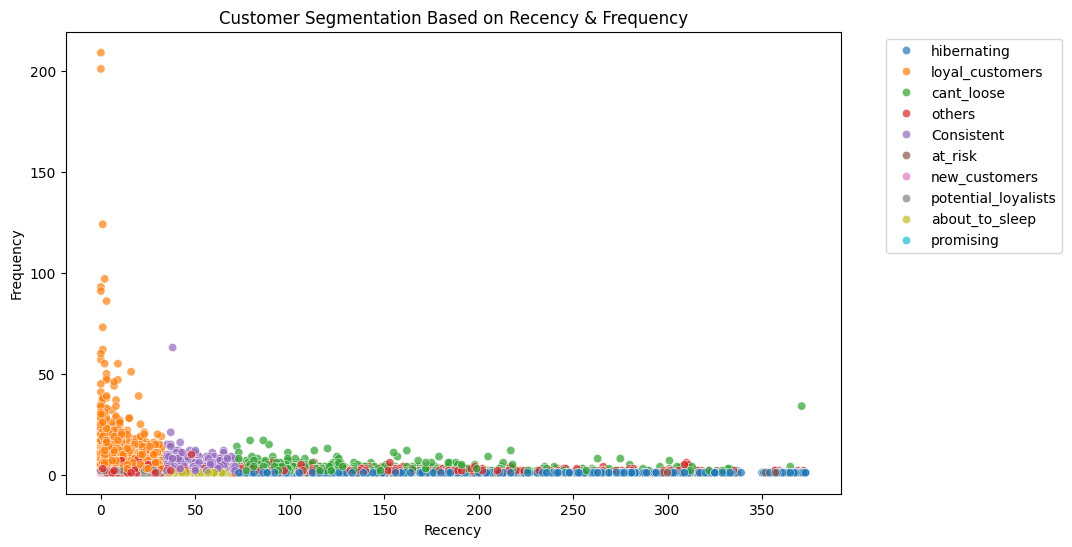

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='segment', palette='tab10', alpha=0.7)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segmentation Based on Recency & Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

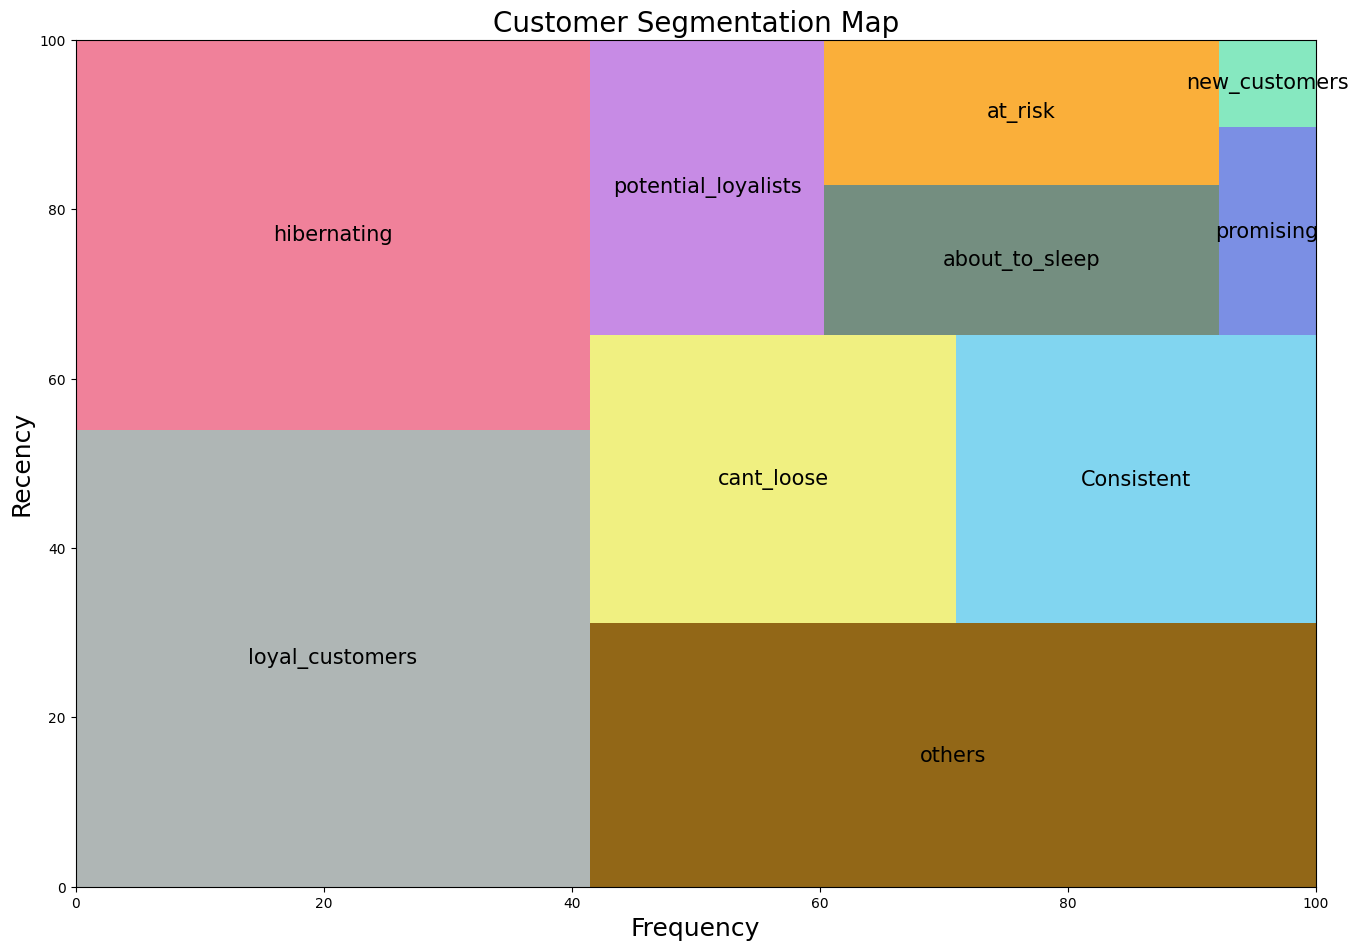

In [ ]:
import squarify

segments = rfm["segment"].value_counts().sort_values(ascending=False)

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 11)

squarify.plot(
    sizes=segments,
    label=segments.index.tolist(),  # Dynamically get the labels
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
        "#86E8C0",
    ][:len(segments)],  # Ensure colors match segment count
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)

plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

In [ ]:
# Group by the combined RFM segments and calculate the total sales
sales_by_rfm = df.groupby(rfm['segment'])['Sales'].sum().reset_index()

# Rename columns for clarity
sales_by_rfm.columns = ['RFM Segment', 'Total Sales']
#round off sales values
sales_by_rfm['Total Sales'] = sales_by_rfm['Total Sales'].round(0).astype(int)
# sorting
sales_by_rfm = sales_by_rfm.sort_values(by='Total Sales', ascending=False)


In [ ]:
sales_by_rfm

,RFM Segment,Total Sales
5,loyal_customers,10174
7,others,7803
4,hibernating,6219
0,Consistent,3619
3,cant_loose,3563
8,potential_loyalists,2694
1,about_to_sleep,1918
2,at_risk,1889
9,promising,904
6,new_customers,309


Text(0.5, 1.0, 'Total Sales by RFM Segment')

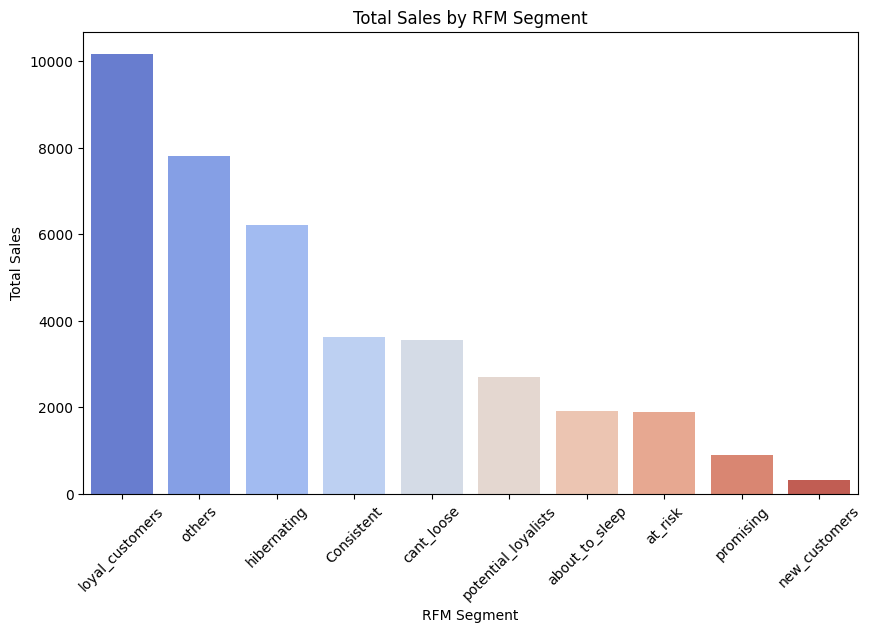

In [ ]:
# Sales chart
plt.figure(figsize=(10, 6))
sns.barplot(x='RFM Segment', y='Total Sales', data=sales_by_rfm, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Total Sales by RFM Segment')

# Cohort Analysis

In [ ]:
# dataset preview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  float64       
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  category      
 7   Country      392692 non-null  object        
 8   Year         392692 non-null  int32         
 9   Month        392692 non-null  int32         
 10  Sales        392692 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int32(2), object(4)
memory usage: 38.9+ MB


In [ ]:
# GEt invoiced datr-period (MP)
df['Invoice_month'] = df['InvoiceDate'].dt.to_period('M')
# create cohort data by grouping it with customer iD
cohort_Data = df.groupby('CustomerID')['Invoice_month'].min().reset_index()
# renaming column

In [ ]:
# renaming column
cohort_Data.rename(columns={'Invoice_month': 'Cohort_month'}, inplace=True)
# merge cohort data with main dataset
df = df.merge(cohort_Data, on='CustomerID')

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Invoice_month,Cohort_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12


In [ ]:
# Define a function to compute the difference in months between two dates
def get_month_offset(row):
    year_diff = row['Invoice_month'].year - row['Cohort_month'].year
    month_diff = row['Invoice_month'].month - row['Cohort_month'].month
    return year_diff * 12 + month_diff + 1

# Apply the function to each row to create a new column 'CohortIndex'
df['CohortIndex'] = df.apply(get_month_offset, axis=1)
# data preview
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Invoice_month,Cohort_month,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1


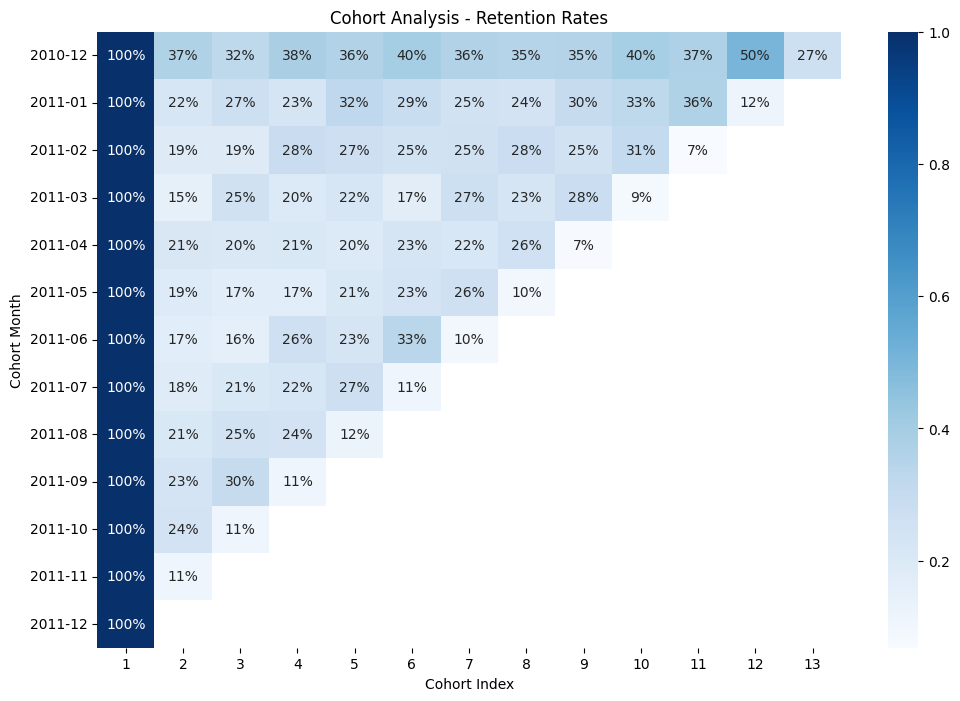

In [ ]:
# Group the data by CohortMonth and CohortIndex and count the unique customers
cohort_count = df.groupby(['Cohort_month', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot the data to create a cohort table
cohort_pivot = cohort_count.pivot_table(index='Cohort_month', columns='CohortIndex', values='CustomerID')
# Get the size of each cohort (number of customers in the first month)
cohort_size = cohort_pivot.iloc[:, 0]

# Divide each cell by the corresponding cohort's size to get retention percentages
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Analysis - Retention Rates')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

In [ ]:
# cohort grouping by sales
cohort_sales = df.groupby(['CohortIndex'])['Sales'].sum().reset_index()
# round off
cohort_sales['Sales'] = cohort_sales['Sales'].round(0).astype(int)
# sort data
cohort_sales = cohort_sales.sort_values(by='Sales', ascending=False)
# display data
cohort_sales

,CohortIndex,Sales
0,1,1646074
5,6,418459
3,4,412684
1,2,398277
9,10,395792
2,3,393624
6,7,383406
4,5,378310
7,8,370650
11,12,355829


Text(0, 0.5, 'Total Sales')

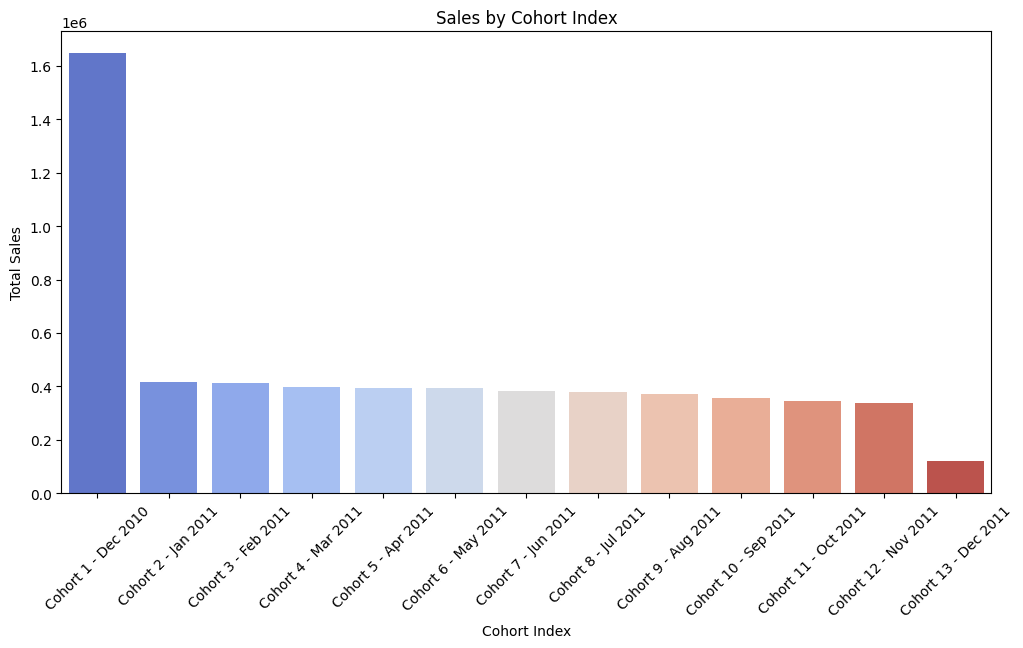

In [ ]:
# chort index names
cohort_names = ['Cohort 1 - Dec 2010', 'Cohort 2 - Jan 2011', 'Cohort 3 - Feb 2011',
    'Cohort 4 - Mar 2011', 'Cohort 5 - Apr 2011', 'Cohort 6 - May 2011',
    'Cohort 7 - Jun 2011', 'Cohort 8 - Jul 2011', 'Cohort 9 - Aug 2011',
    'Cohort 10 - Sep 2011', 'Cohort 11 - Oct 2011', 'Cohort 12 - Nov 2011',
    'Cohort 13 - Dec 2011'
]
# barchart of sales and cohort
plt.figure(figsize=(12,6))
sns.barplot(x=cohort_names, y='Sales', data=cohort_sales, palette='coolwarm')
plt.title('Sales by Cohort Index')
plt.xlabel('Cohort Index')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')

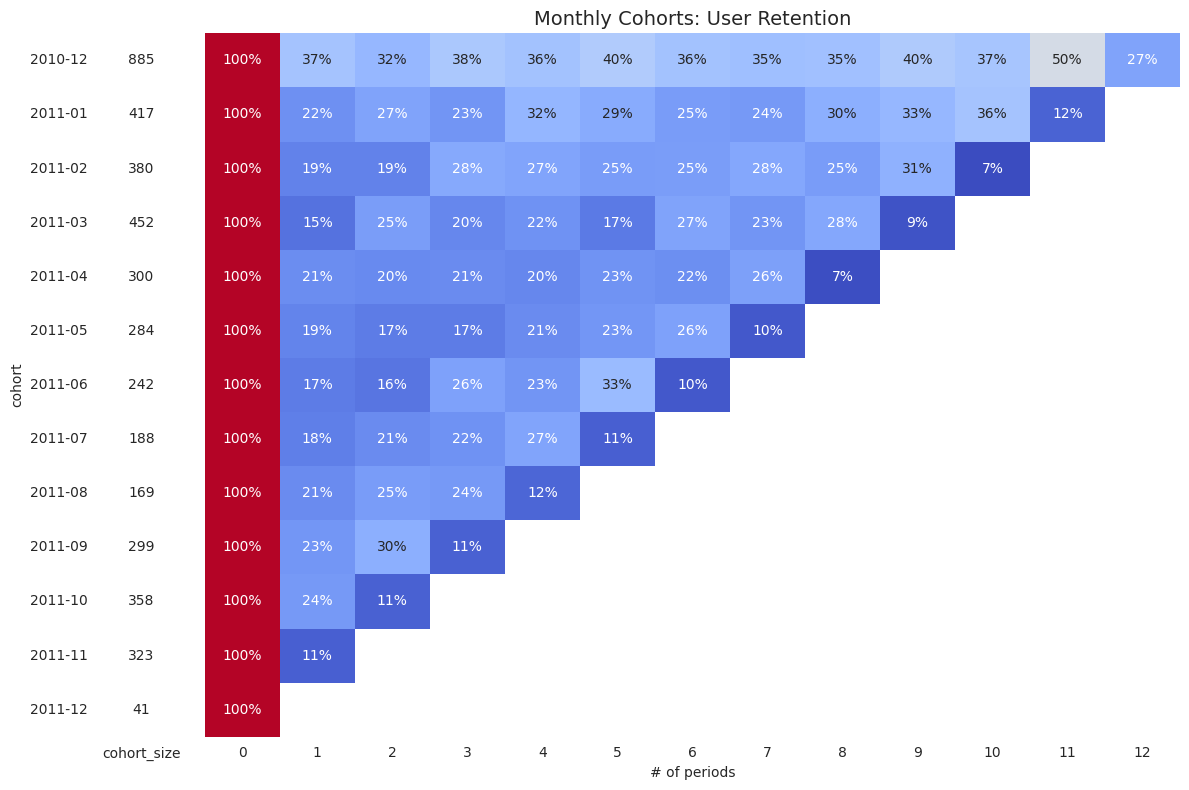

In [ ]:
from operator import attrgetter
import matplotlib.colors as mcolors
def CohortAnalysis(dataframe):

    data = dataframe.copy()
    data = data[["CustomerID", "InvoiceNo", "InvoiceDate"]].drop_duplicates()
    data["order_month"] = data["InvoiceDate"].dt.to_period("M")
    data["cohort"] = (
        data.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")
    )
    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("CustomerID", "nunique"))
        .reset_index(drop=False)
    )
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )
    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )
    cohort_size = cohort_pivot.iloc[:, 0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),
            annot=True,
            cbar=False,
            fmt=".0%",
            cmap="coolwarm",
            ax=ax[1],
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
        ax[1].set(xlabel="# of periods", ylabel="")
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),
            annot=True,
            cbar=False,
            fmt="g",
            cmap=white_cmap,
            ax=ax[0],
        )
        fig.tight_layout()

CohortAnalysis(df)

# Extra

In [ ]:
# lets preview our dataset
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Invoice_month,Cohort_month,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1


In [ ]:
# first purchase month = cohrt month - so we can drop it
df_2 = df.copy()
df_2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Invoice_month,Cohort_month,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1


In [ ]:
# to get active users we have to group the data
# by the period (e.g., month) and counting the number of unique customers who made a purchase in that period.

active_customers  = df_2.groupby('Cohort_month')['CustomerID'].nunique()
print(active_customers)

Cohort_month
2010-12    885
2011-01    417
2011-02    380
2011-03    452
2011-04    300
2011-05    284
2011-06    242
2011-07    188
2011-08    169
2011-09    299
2011-10    358
2011-11    323
2011-12     41
Freq: M, Name: CustomerID, dtype: int64


In [ ]:
# Step 3: Calculate churned customers by finding the difference between consecutive periods
churned_customers = active_customers.shift(1) - active_customers
churned_customers = churned_customers.fillna(0).astype(int)  # Fill NaN for the first period with 0

# Display churned customers per month
print(churned_customers)

Cohort_month
2010-12      0
2011-01    468
2011-02     37
2011-03    -72
2011-04    152
2011-05     16
2011-06     42
2011-07     54
2011-08     19
2011-09   -130
2011-10    -59
2011-11     35
2011-12    282
Freq: M, Name: CustomerID, dtype: int64


In [ ]:
churned_customers = churned_customers.fillna(0).astype(int)

In [ ]:
# calculate churn rate
churn_rate = (churned_customers / active_customers.shift(1)) * 100
churn_rate = churn_rate.fillna(0).round(2) # Fill NaNs and round to 2 decimal places
# Display churn rate per month
print(churn_rate)

Cohort_month
2010-12     0.00
2011-01    52.88
2011-02     8.87
2011-03   -18.95
2011-04    33.63
2011-05     5.33
2011-06    14.79
2011-07    22.31
2011-08    10.11
2011-09   -76.92
2011-10   -19.73
2011-11     9.78
2011-12    87.31
Freq: M, Name: CustomerID, dtype: float64


In [ ]:
churned_customers = active_customers.shift(1) - active_customers
churn_rate = (churned_customers.clip(lower=0) / active_customers.shift(1)) * 100
churn_rate = churn_rate.fillna(0).round(2)
churn_rate

,CustomerID
Cohort_month,
2010-12,0.00
2011-01,52.88
2011-02,8.87
2011-03,0.00
2011-04,33.63
2011-05,5.33
2011-06,14.79
2011-07,22.31
2011-08,10.11


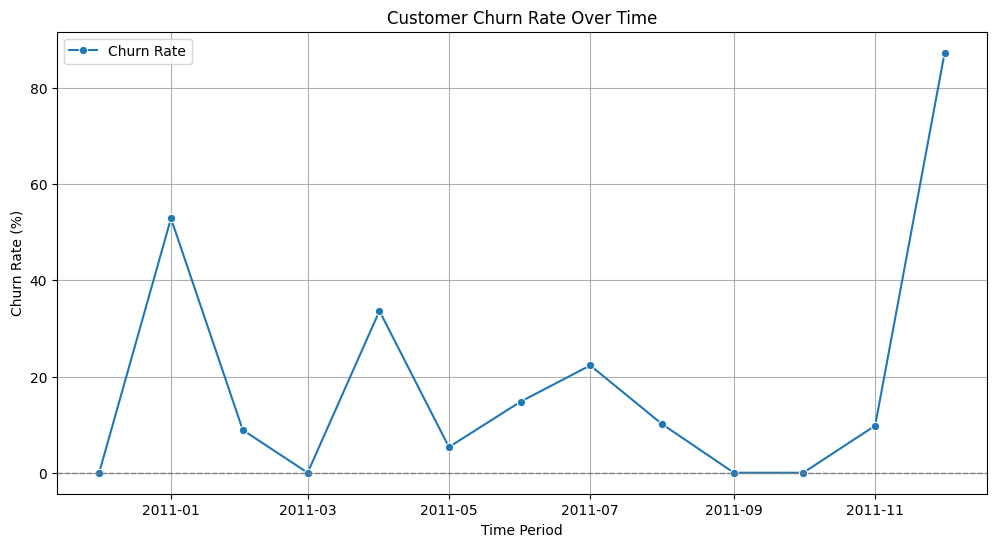

In [ ]:
# Convert PeriodIndex to Timestamp
churn_rate.index = churn_rate.index.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x=churn_rate.index, y=churn_rate, marker='o', label='Churn Rate')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Reference line at 0
plt.title('Customer Churn Rate Over Time')
plt.xlabel('Time Period')
plt.ylabel('Churn Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Invoice_month,Cohort_month,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680,France,2011,12,10.20,2011-12,2011-08,5
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680,France,2011,12,12.60,2011-12,2011-08,5
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680,France,2011,12,16.60,2011-12,2011-08,5
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680,France,2011,12,16.60,2011-12,2011-08,5


# Getting data for PowerBI Analysis

In [ ]:
# current data preview
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Invoice_month,Cohort_month,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,2010-12,2010-12,1


In [ ]:
# Merge rfm
df_merged = df.merge(rfm, on='CustomerID')
# display new df
df_merged.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,...,Cohort_month,CohortIndex,Recency,Frequency,Monetary,R,F,M,RFM_Score,segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,...,2010-12,1,371.0,34,4904.66,1,5,5,155,cant_loose
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,...,2010-12,1,371.0,34,4904.66,1,5,5,155,cant_loose
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,...,2010-12,1,371.0,34,4904.66,1,5,5,155,cant_loose
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,...,2010-12,1,371.0,34,4904.66,1,5,5,155,cant_loose
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,...,2010-12,1,371.0,34,4904.66,1,5,5,155,cant_loose


In [ ]:
# naming months
months_dict = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
# map dictionary to month column
df_merged['Month'] = df_merged['Month'].map(months_dict)
# display result
df_merged.Month


,Month
0,Dec
1,Dec
2,Dec
3,Dec
4,Dec
...,...
392687,Dec
392688,Dec
392689,Dec
392690,Dec


In [ ]:
# convert floating point values to integers
df_merged['Monetary'] = df_merged['Monetary'].astype(int)
df_merged['Recency'] = df_merged['Recency'].astype(int)
# preview new dataframe
df_merged.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,...,Cohort_month,CohortIndex,Recency,Frequency,Monetary,R,F,M,RFM_Score,segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,Dec,...,2010-12,1,371,34,4904,1,5,5,155,cant_loose
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,Dec,...,2010-12,1,371,34,4904,1,5,5,155,cant_loose
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,Dec,...,2010-12,1,371,34,4904,1,5,5,155,cant_loose
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,Dec,...,2010-12,1,371,34,4904,1,5,5,155,cant_loose
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,Dec,...,2010-12,1,371,34,4904,1,5,5,155,cant_loose


In [ ]:
# Save the DataFrame to an Excel file on your local machine
file_path = 'C://Users//user//Desktop//CRM DATA.xlsx'  # Specify the file name and path (e.g., 'C:/path/to/your/folder/Ecommerce_data.xlsx')
df_merged.to_excel(file_path, index=False)